In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
train.drop(columns= ['Cabin'], inplace=True)
test.drop(columns= ['Cabin'], inplace=True)

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
train['Embarked'].fillna('S', inplace=True)

/tmp/ipython-input-1021043716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)


In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [ ]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

/tmp/ipython-input-4105841904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)

In [ ]:
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)

In [ ]:
train['Age'][train['Age'].isnull()] = train_age
test['Age'][test['Age'].isnull()] = test_age

/tmp/ipython-input-4065066975.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()] = train_age
/tmp/ipython-input-4065066975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
# Preprocessing done

In [ ]:
# EDA Starts

In [ ]:
train.groupby(['Pclass'])['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
train.groupby(['Sex'])['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
train.groupby(['Embarked'])['Survived'].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


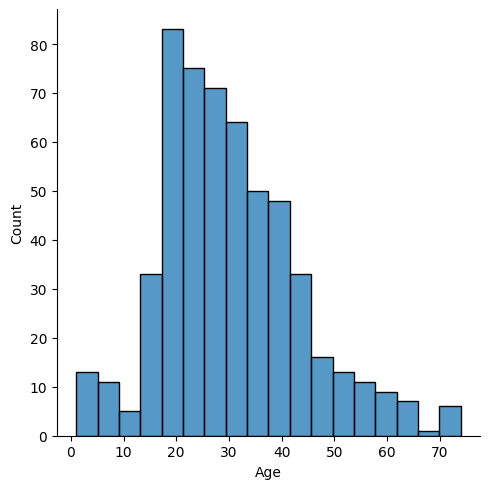

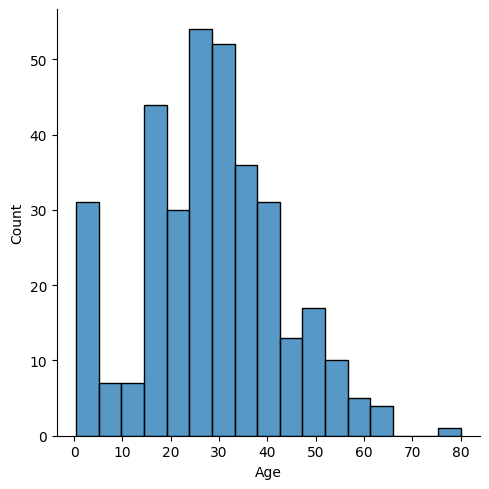

In [ ]:
sns.displot(train['Age'][train['Survived']==0])
sns.displot(train['Age'][train['Survived']==1])

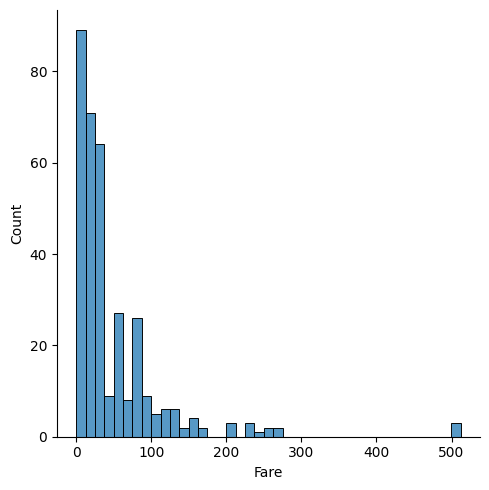

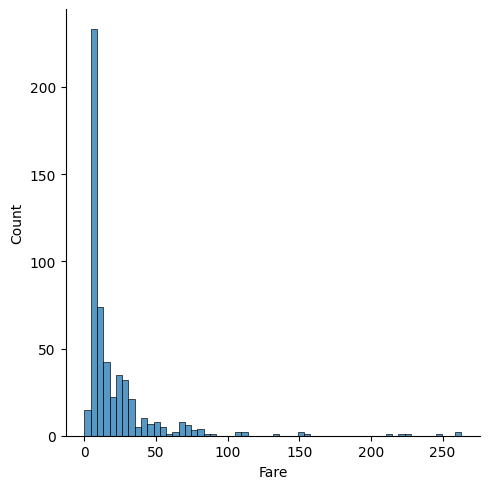

In [ ]:
sns.displot(train['Fare'][train['Survived']==1])
sns.displot(train['Fare'][train['Survived']==0])

In [ ]:
train.drop(columns='Ticket', inplace=True)
test.drop(columns='Ticket', inplace=True)

In [ ]:
train['family'] = train['SibSp'] + train['Parch']+1

In [ ]:
test['family'] = test['SibSp'] + test['Parch']+1

In [ ]:
train.groupby(['family'])['Survived'].mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [ ]:
def cal(num):
  if num ==1:
    return 'Alone';
  elif num>1 and num<5:
    return 'Midum'
  else:
    return 'Large'

In [ ]:
train['family_size'] = train['family'].apply(cal)

In [ ]:
test['family_size'] = test['family'].apply(cal)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Midum
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Midum


In [ ]:
train.drop(columns = ['Parch', 'family', 'SibSp'], inplace=True)

In [ ]:
test.drop(columns = ['Parch', 'family', 'SibSp'], inplace=True)

In [ ]:
train.shape

(891, 9)

In [ ]:
test.shape

(418, 8)

In [ ]:
passengerId = test['PassengerId'].values

In [ ]:
train.drop(columns = ['Name', 'PassengerId'], inplace=True)
test.drop(columns = ['Name', 'PassengerId'], inplace=True)

In [ ]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
family_size,0


In [ ]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
family_size,0


In [ ]:
train = pd.get_dummies(train, columns=['Pclass','Sex', 'Embarked', 'family_size'])


In [ ]:
train

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Midum
0,0,22.0,7.2500,False,False,True,False,True,False,False,True,False,False,True
1,1,38.0,71.2833,True,False,False,True,False,True,False,False,False,False,True
2,1,26.0,7.9250,False,False,True,True,False,False,False,True,True,False,False
3,1,35.0,53.1000,True,False,False,True,False,False,False,True,False,False,True
4,0,35.0,8.0500,False,False,True,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,False,True,False,False,True,False,False,True,True,False,False
887,1,19.0,30.0000,True,False,False,True,False,False,False,True,True,False,False
888,0,27.0,23.4500,False,False,True,True,False,False,False,True,False,False,True
889,1,26.0,30.0000,True,False,False,False,True,True,False,False,True,False,False


In [ ]:
bool_cols = train.select_dtypes(include='bool').columns
train[bool_cols] = train[bool_cols].astype(int)

In [ ]:
train

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Midum
0,0,22.0,7.2500,0,0,1,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,1,0,0,0,0,1
2,1,26.0,7.9250,0,0,1,1,0,0,0,1,1,0,0
3,1,35.0,53.1000,1,0,0,1,0,0,0,1,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,1,0,0,1,0,0,1,1,0,0
887,1,19.0,30.0000,1,0,0,1,0,0,0,1,1,0,0
888,0,27.0,23.4500,0,0,1,1,0,0,0,1,0,0,1
889,1,26.0,30.0000,1,0,0,0,1,1,0,0,1,0,0


In [ ]:
test = pd.get_dummies(test, columns=['Pclass','Sex', 'Embarked', 'family_size'])

In [ ]:
test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Midum
0,34.5,7.8292,False,False,True,False,True,False,True,False,True,False,False
1,47.0,7.0000,False,False,True,True,False,False,False,True,False,False,True
2,62.0,9.6875,False,True,False,False,True,False,True,False,True,False,False
3,27.0,8.6625,False,False,True,False,True,False,False,True,True,False,False
4,22.0,12.2875,False,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,23.0,8.0500,False,False,True,False,True,False,False,True,True,False,False
414,39.0,108.9000,True,False,False,True,False,True,False,False,True,False,False
415,38.5,7.2500,False,False,True,False,True,False,False,True,True,False,False
416,32.0,8.0500,False,False,True,False,True,False,False,True,True,False,False


In [ ]:
bool_cols = test.select_dtypes(include='bool').columns
test[bool_cols] = test[bool_cols].astype(int)

In [ ]:
test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Midum
0,34.5,7.8292,0,0,1,0,1,0,1,0,1,0,0
1,47.0,7.0000,0,0,1,1,0,0,0,1,0,0,1
2,62.0,9.6875,0,1,0,0,1,0,1,0,1,0,0
3,27.0,8.6625,0,0,1,0,1,0,0,1,1,0,0
4,22.0,12.2875,0,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,23.0,8.0500,0,0,1,0,1,0,0,1,1,0,0
414,39.0,108.9000,1,0,0,1,0,1,0,0,1,0,0
415,38.5,7.2500,0,0,1,0,1,0,0,1,1,0,0
416,32.0,8.0500,0,0,1,0,1,0,0,1,1,0,0


In [ ]:
X = train.iloc[:, 1:].values
Y = train.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.7374301675977654

In [ ]:
Xf=test.iloc[:,:].values

In [ ]:
Y_final = classifier.predict(Xf)

In [ ]:
final= pd.DataFrame()

In [ ]:
final['PassengerId'] = passengerId
final['Survived'] = Y_final

In [ ]:
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,1


In [ ]:
final.to_csv("submission.csv", index=False)